# K-Means Customer Segmentation

## Introduction
This notebook demonstrates how to perform **customer segmentation** using the **K-Means clustering algorithm**. Customer segmentation helps businesses understand their customers better and tailor marketing strategies accordingly.

We use a dataset from a supermarket mall that contains:
- **CustomerID**: Unique identifier for each customer
- **Gender**: Male or Female
- **Age**: Age of the customer
- **Annual Income (k$)**: Annual income in thousand dollars
- **Spending Score (1-100)**: Score assigned based on purchasing behavior and engagement

### Objectives
1. Preprocess the customer data for clustering.
2. Identify meaningful customer segments using K-Means.
3. Visualize and interpret the clusters.
4. Analyze cluster characteristics to guide marketing strategies.
5. Identify target customers for focused marketing.
6. Save the clustered dataset and trained K-Means model for future use.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
from mpl_toolkits.mplot3d import Axes3D

---

## Data Overview

The dataset consists of customer information collected from a supermarket mall. It contains the following features:

- **CustomerID**: Unique identifier for each customer
- **Gender**: Gender of the customer (Male/Female)
- **Age**: Age of the customer
- **Annual Income (k$)**: Annual income in thousand dollars
- **Spending Score (1-100)**: Score assigned based on customer purchasing behavior and engagement

We have two versions of the dataset:
1. **Original dataset (`data`)**: Contains raw values for all features including CustomerID and Gender.
2. **Preprocessed dataset (`df`)**: Features have been standardized/normalized and categorical variables encoded to numeric for clustering purposes.

This section gives a preview of both datasets, their structure, and basic statistics.


In [2]:
data = pd.read_csv("datasets/data.csv") 
df = pd.read_csv("datasets/data-clean.csv")

# Add numeric Gender column to original data for plotting
data["Gender_"] = df["Gender"]  # 0=Male, 1=Female

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [3]:
print("Original Dataset (data) Preview:\n", data.head(), "\n")
print("Info:\n")
data.info()
print("\nStatistics:\n", data.describe(), "\n\n\n")

print("Preprocessed Dataset (df) Preview:\n", df.head(), "\n")
print("Info:\n")
df.info()
print("\nStatistics:\n", df.describe())

Original Dataset (data) Preview:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_  
0        1  
1        1  
2        0  
3        0  
4        0   

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Scor

---

## Finding Optimal Clusters

Before applying K-Means clustering, it is important to determine the optimal number of clusters (`k`) for our dataset. Choosing the right `k` helps in creating meaningful customer segments.

### Methods Used
1. **Elbow Method**: Plots the sum of squared distances (inertia) against the number of clusters. The point where the curve starts to bend (“elbow”) indicates a good choice for `k`.
2. **Silhouette Score**: Measures how similar each point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

This section guides the selection of the optimal number of clusters for K-Means.


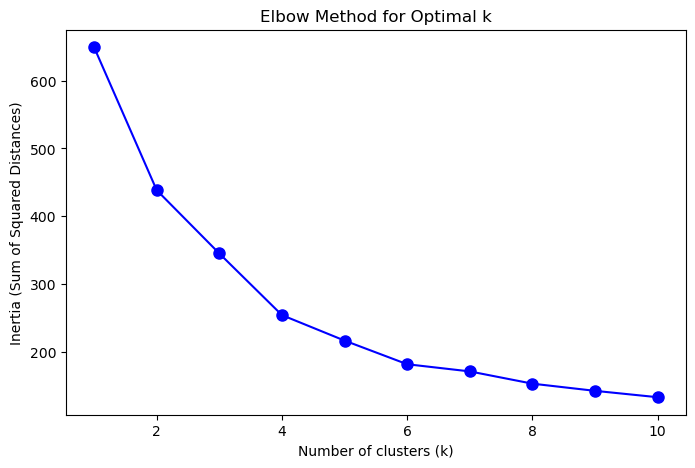

In [4]:
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.savefig(f"plots/Elbow Method for Optimal k.png")
plt.show()

In [5]:
best_k = 0
best_score = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"k={k} → Silhouette Score={score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print("\nSuggested optimal number of clusters based on silhouette score:", best_k)

k=2 → Silhouette Score=0.303
k=3 → Silhouette Score=0.312
k=4 → Silhouette Score=0.350
k=5 → Silhouette Score=0.350
k=6 → Silhouette Score=0.356
k=7 → Silhouette Score=0.332
k=8 → Silhouette Score=0.336
k=9 → Silhouette Score=0.312
k=10 → Silhouette Score=0.309

Suggested optimal number of clusters based on silhouette score: 6


---

## K-Means Clustering & Cluster Assignment

Once the optimal number of clusters is determined, we apply the **K-Means algorithm** to the preprocessed data (`df`) to identify customer segments.

### Steps
1. Fit the K-Means model using the optimal `k`.
2. Predict cluster labels for each customer.
3. Append the cluster labels to the original dataset (`data`) for interpretation and visualization.
4. Inspect the distribution of customers across clusters.


In [6]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(df)

data["Cluster"] = cluster_labels

print("First 5 rows with cluster labels:\n")
data.head()

First 5 rows with cluster labels:



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_,Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


In [7]:
cluster_counts = data["Cluster"].value_counts().sort_index()
print("Number of customers in each cluster:\n", cluster_counts)

Number of customers in each cluster:
 Cluster
0    45
1    39
2    21
3    34
4    23
5    38
Name: count, dtype: int64


---

## Cluster Visualization

Visualizing clusters helps in understanding the customer segments and their characteristics.

### Plots Included
1. **Annual Income vs Spending Score Scatter Plot**  
   Shows how customers are distributed across clusters based on their income and spending behavior.

2. **PCA-based 2D Scatter Plot**  
   Reduces the dataset to 2 principal components for easy visualization of clusters.

3. **Cluster Centers Line Plot**  
   Plots standardized/normalized feature values of cluster centers to compare differences between clusters.

4. **Cluster Distribution Count Plot**  
   Shows the number of customers in each cluster.

5. **Pairplot of Features by Cluster**  
   Visualizes pairwise relationships among features with clusters distinguished by color.

6. **Boxplots per Cluster by Gender**  
   Shows the distribution of Age, Annual Income, and Spending Score in each cluster, separated by gender.

7. **Heatmap of Cluster Centers (Actual Data)**  
   Displays average values of features (including gender ratio) per cluster.

8. **3D Scatter Plot**  
   Visualizes Age, Annual Income, and Spending Score in 3D with cluster coloring.


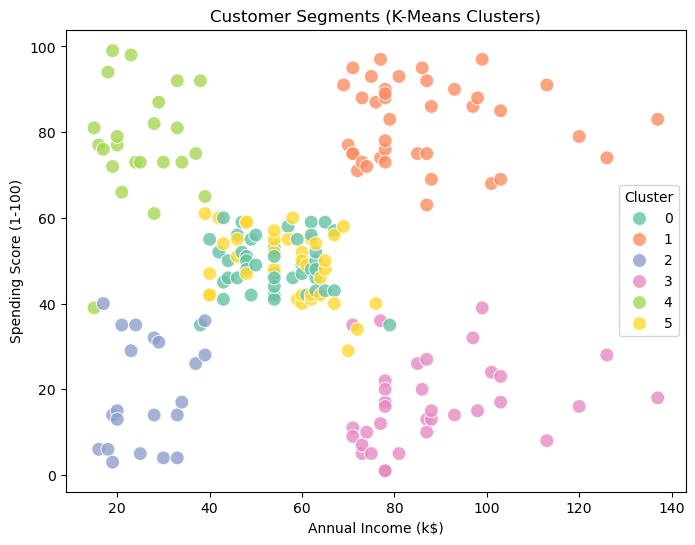

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data["Annual Income (k$)"], 
    y=data["Spending Score (1-100)"], 
    hue=data["Cluster"], 
    palette="Set2",
    s=100,
    alpha=0.8
)

plt.title("Customer Segments (K-Means Clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.savefig(f"plots/Customer Segments (K-Means Clusters).png")
plt.show()

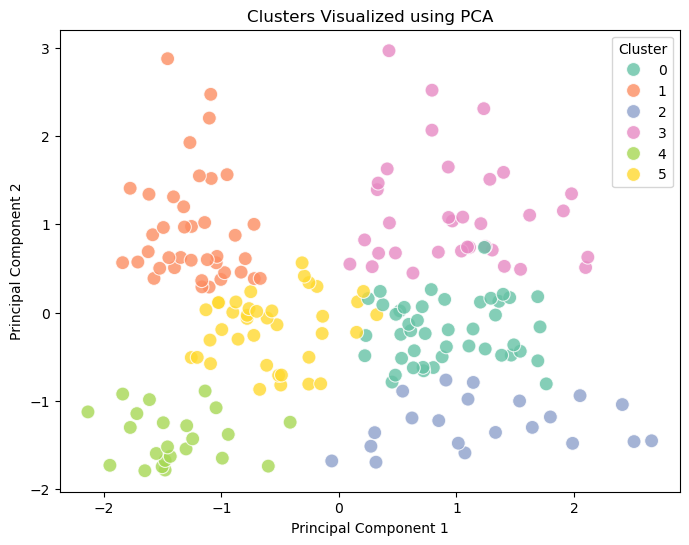

In [9]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = data["Cluster"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1", 
    y="PC2", 
    hue="Cluster", 
    data=pca_df, 
    palette="Set2",
    s=100,
    alpha=0.8
)

plt.title("Clusters Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.savefig(f"plots/Clusters Visualized using PCA.png")
plt.show()

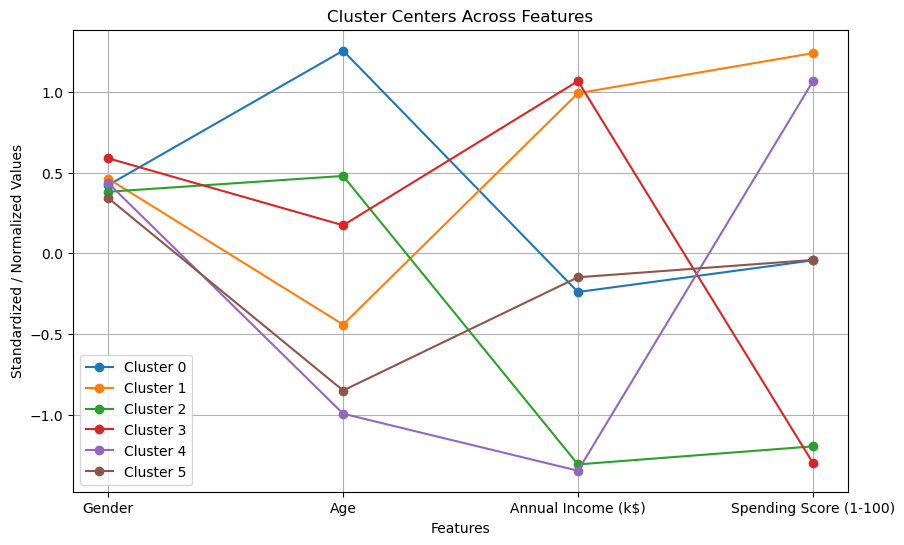

In [10]:
centers = kmeans.cluster_centers_
features = df.columns

plt.figure(figsize=(10,6))
for i, center in enumerate(centers):
    plt.plot(features, center, marker='o', label=f"Cluster {i}")

plt.title("Cluster Centers Across Features")
plt.ylabel("Standardized / Normalized Values")
plt.xlabel("Features")
plt.legend()
plt.grid(True)
plt.savefig(f"plots/Cluster Centers Across Features.png")
plt.show()

/tmp/ipykernel_14103/2854360961.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=data, palette="Set2")


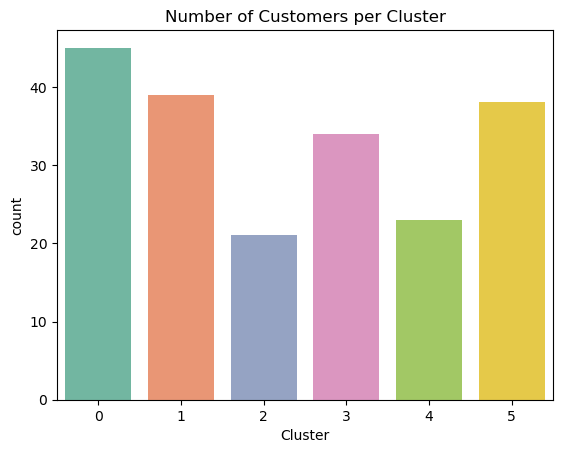

In [11]:
sns.countplot(x="Cluster", data=data, palette="Set2")
plt.title("Number of Customers per Cluster")
plt.savefig(f"plots/Number of Customers per Cluster.png")
plt.show()

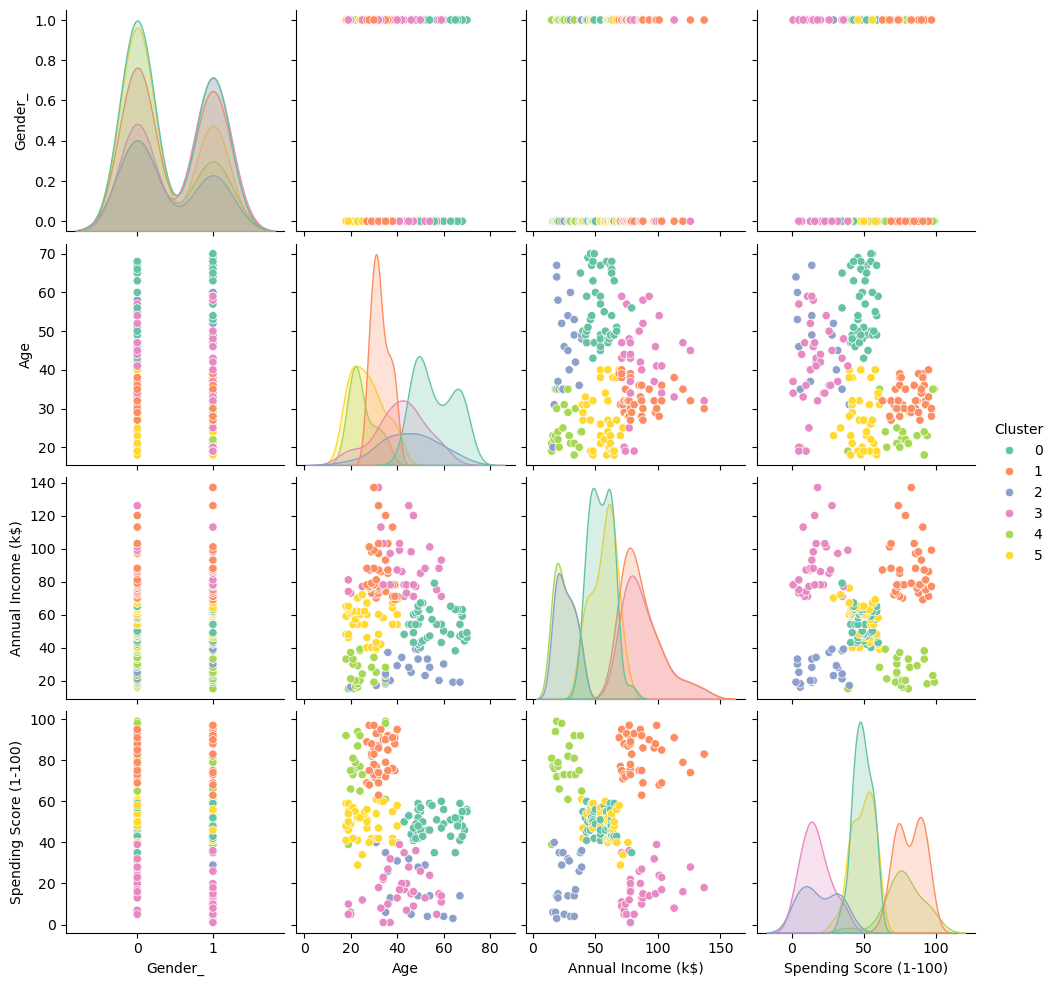

In [12]:
sns.pairplot(
    data,
    vars=["Gender_", "Age", "Annual Income (k$)", "Spending Score (1-100)"],
    hue="Cluster",               
    palette="Set2",
    diag_kind="kde"
)
plt.savefig(f"plots/Pairplot.png")
plt.show()

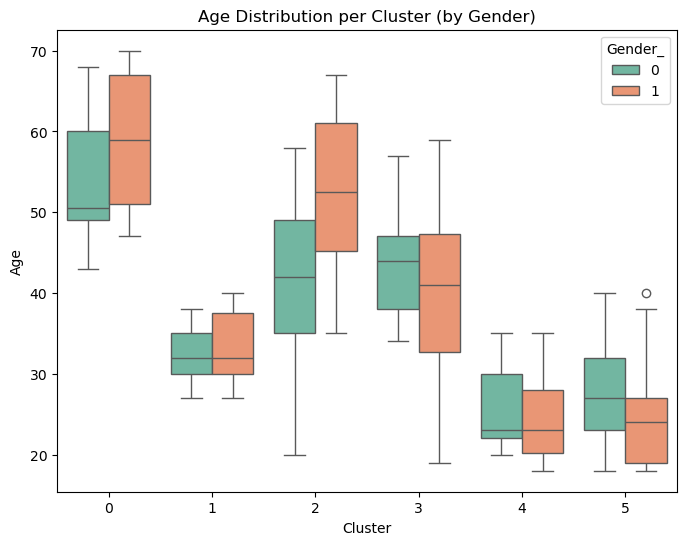

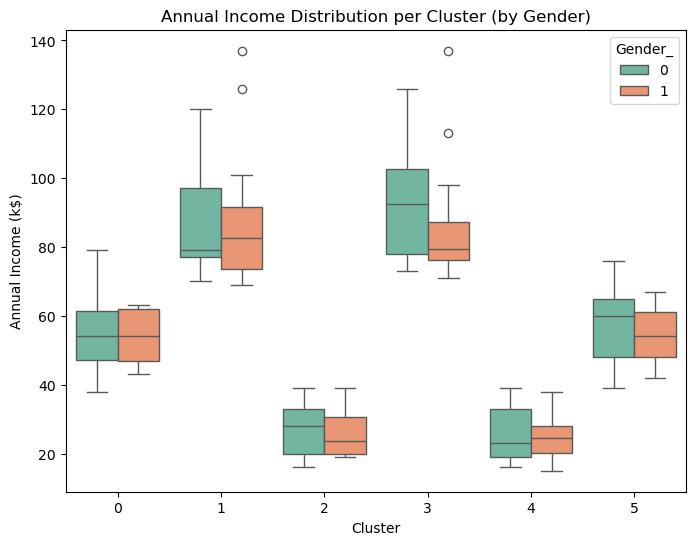

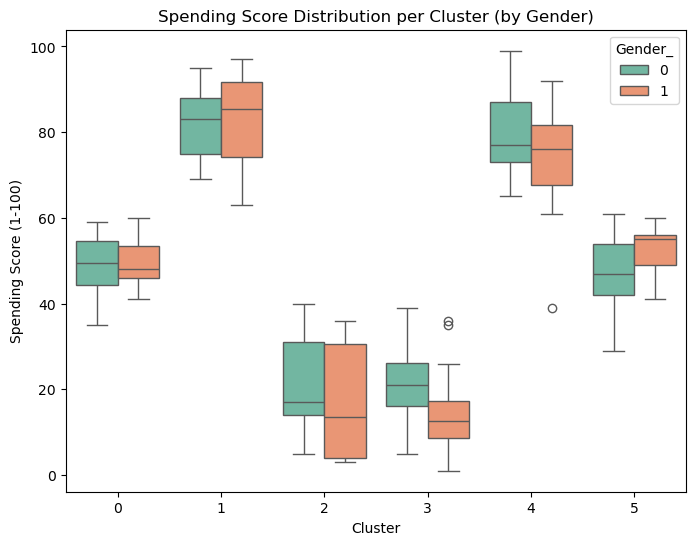

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="Age", hue="Gender_", data=data, palette="Set2")
plt.title("Age Distribution per Cluster (by Gender)")
plt.savefig(f"plots/Age Distribution per Cluster (by Gender).png")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="Annual Income (k$)", hue="Gender_", data=data, palette="Set2")
plt.title("Annual Income Distribution per Cluster (by Gender)")
plt.savefig(f"plots/Annual Income Distribution per Cluster (by Gender).png")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="Spending Score (1-100)", hue="Gender_", data=data, palette="Set2")
plt.title("Spending Score Distribution per Cluster (by Gender)")
plt.savefig(f"plots/Annual Income Distribution per Cluster (by Gender).png")
plt.show()

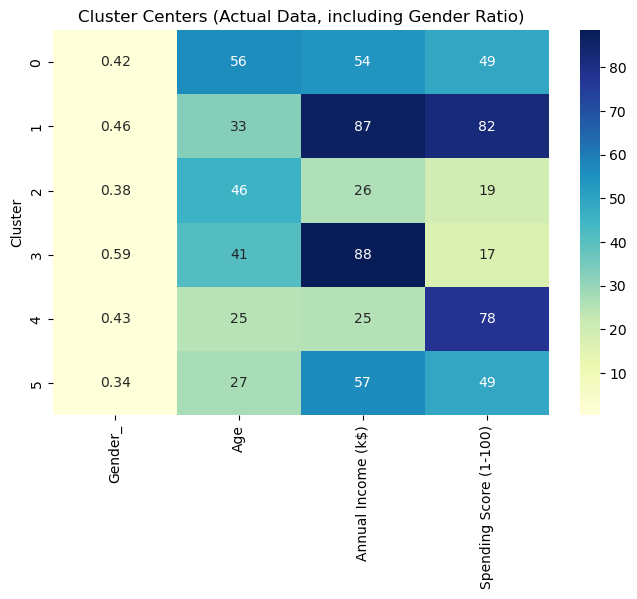

In [14]:
centers_raw_gender = data.groupby("Cluster")[["Gender_", "Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

plt.figure(figsize=(8,5))
sns.heatmap(centers_raw_gender, annot=True, cmap="YlGnBu")
plt.title("Cluster Centers (Actual Data, including Gender Ratio)")
plt.savefig(f"plots/Cluster Centers (Actual Data, including Gender Ratio).png")
plt.show()

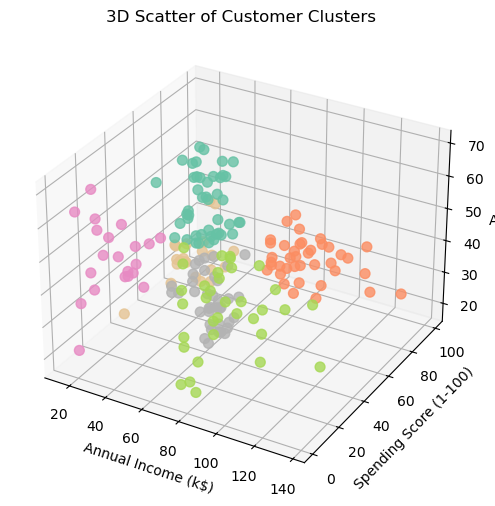

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    data["Annual Income (k$)"],
    data["Spending Score (1-100)"],
    data["Age"],
    c=data["Cluster"],
    cmap="Set2",
    s=50,
    alpha=0.8
)

ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Age")
plt.title("3D Scatter of Customer Clusters")
plt.savefig(f"plots/3D Scatter of Customer Clusters.png")
plt.show()

---

## Cluster Analysis & Summary

After assigning clusters, we analyze their characteristics to understand each customer segment.

### Steps
1. Create a new DataFrame (`df_`) combining preprocessed features, `CustomerID`, and cluster labels.
2. Compute summary statistics for each cluster:
   - **Female Ratio** (average of `Gender` column)
   - **Age**: mean, min, max
   - **Annual Income (k$)**: mean, min, max
   - **Spending Score (1-100)**: mean, min, max
   - **Count**: number of customers in the cluster

This analysis provides insights into the demographic and behavioral patterns of each customer segment.


In [16]:
df_ = df.copy()                  
df_["CustomerID"] = data["CustomerID"]   
df_["Cluster"] = data["Cluster"]         
df_.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),CustomerID,Cluster
0,1,-1.424569,-1.738999,-0.434801,1,4
1,1,-1.281035,-1.738999,1.195704,2,4
2,0,-1.352802,-1.700830,-1.715913,3,2
3,0,-1.137502,-1.700830,1.040418,4,4
4,0,-0.563369,-1.662660,-0.395980,5,2


In [17]:
cluster_summary = df_.groupby("Cluster").agg({
    "Gender": "mean",          
    "Age": ["mean", "min", "max"],
    "Annual Income (k$)": ["mean", "min", "max"],
    "Spending Score (1-100)": ["mean", "min", "max"],
    "CustomerID": "count"
}).round(2)

cluster_summary.rename(columns={"CustomerID": "Count", "Gender": "Female Ratio"}, inplace=True)
cluster_summary

Female Ratio   Age             Annual Income (k$)              \
                mean  mean   min   max               mean   min   max   
Cluster                                                                 
0               0.42  1.25  0.30  2.24              -0.24 -0.86  0.70   
1               0.46 -0.44 -0.85  0.08               0.99  0.32  2.92   
2               0.38  0.48 -1.35  2.02              -1.31 -1.70 -0.82   
3               0.59  0.17 -1.42  1.45               1.07  0.40  2.92   
4               0.43 -0.99 -1.50 -0.28              -1.35 -1.74 -0.82   
5               0.34 -0.85 -1.50  0.08              -0.15 -0.82  0.59   

        Spending Score (1-100)             Count  
                          mean   min   max count  
Cluster                                           
0                        -0.04 -0.59  0.38    45  
1                         1.24  0.50  1.82    39  
2                        -1.20 -1.83 -0.40    21  
3                        -1.30 -1.91 -0.43    34  
4                         1.06 -0.43  1.89    23  
5                        -0.04 -0.82  0.42    38

## Identifying Target Customers

Based on cluster assignments and business criteria, we identify **target customers** who are most valuable for marketing strategies.

### Criteria
- High **Spending Score** (>= 70)
- High **Annual Income (k$)** (>= 60)

These customers are likely to respond positively to marketing campaigns and can be prioritized for promotions, loyalty programs, or special offers.

The selected target customers are stored separately for easy reference.


In [18]:
target_customers = data[
    (data["Spending Score (1-100)"] >= 70) & 
    (data["Annual Income (k$)"] >= 60)
]

print("Number of target customers:", target_customers.shape[0])
target_customers.head()

Number of target customers: 35


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_,Cluster
123,124,Male,39,69,91,1,1
125,126,Female,31,70,77,0,1
127,128,Male,40,71,95,1,1
129,130,Male,38,71,75,1,1
131,132,Male,39,71,75,1,1


---

## Saving Data & Model

To preserve our work and facilitate future analysis, we save:

1. **Clustered Dataset**  
   The original dataset with appended cluster labels is saved as `Mall_Customers_with_Clusters.csv`.

2. **Target Customers**  
   The subset of target customers is saved separately as `Target_Customers.csv`.

3. **Trained K-Means Model**  
   The trained K-Means model is saved using `joblib` as `kmeans_customer_model.pkl` for future predictions or deployment.


In [19]:
output_file = "datasets/Mall_Customers_with_Clusters.csv"
data.to_csv(output_file, index=False)
print(f"Dataset with clusters saved as: {output_file}")

Dataset with clusters saved as: datasets/Mall_Customers_with_Clusters.csv


In [20]:
target_file = "datasets/Target_Customers.csv"
target_customers.to_csv(target_file, index=False)
print(f"Target customers saved as: {target_file}")

Target customers saved as: datasets/Target_Customers.csv


In [21]:
model_file = "models/kmeans_customer_model.pkl"
joblib.dump(kmeans, model_file)
print(f"K-Means model saved as: {model_file}")

K-Means model saved as: models/kmeans_customer_model.pkl


---

## Conclusion

In this notebook, we performed customer segmentation using **K-Means Clustering** on a mall customer dataset.  

### Key Takeaways:
1. **Customer Segments Identified**: Using an optimal number of clusters determined by the **Elbow Method** and **Silhouette Score**, we successfully grouped customers based on their purchasing behavior and demographics.
2. **Cluster Insights**: Analysis revealed differences in age, income, spending score, and gender ratio across clusters.
3. **Target Customers**: High-value customers with high spending scores and high income were identified for focused marketing strategies.
4. **Visualization**: Multiple plots including 2D/3D scatter plots, pairplots, boxplots, and heatmaps helped interpret clusters effectively.
5. **Model Saved**: The trained K-Means model was saved for future predictions or deployment.

This approach can help businesses design targeted marketing campaigns and improve customer engagement based on data-driven insights.


---